<a href="https://colab.research.google.com/github/imkunals726/ML/blob/master/Flowers_recognitionUsingNINandSmallResnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install kaggle

In [0]:
from google.colab import files

In [0]:
# files.upload()



```
Please upload kaggle.json obtained from kaggle (Api Key)
```



In [4]:
!ls | grep kaggle

kaggle.json


In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
# !kaggle datasets list -s flowers

In [9]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 441M/450M [00:07<00:00, 48.6MB/s]
100% 450M/450M [00:07<00:00, 59.4MB/s]


In [10]:
!ls

flowers-recognition.zip  kaggle.json  sample_data


In [0]:
# !unzip flowers-recognition.zip

In [0]:
!mv flowers/flowers validation_images

In [0]:
import tensorflow as tf

In [0]:
def create_mlp_conv_layer(X, filter_size, kernel_shape, strides = (1,1)):
  X = tf.keras.layers.Conv2D(filter_size, kernel_shape, strides = strides)(X)
  X = tf.keras.layers.Conv2D(filter_size,(1,1))(X)
  X = tf.keras.layers.Conv2D(filter_size,(1,1))(X)
  X = tf.keras.layers.ReLU()(X)
  X = tf.keras.layers.MaxPool2D((3,3),strides=(2,2))(X)
  X = tf.keras.layers.BatchNormalization()(X)
  return X


In [0]:
def create_model():
  X_input = tf.keras.layers.Input((256,256,3))

  X = create_mlp_conv_layer(X_input, 96, (11,11), strides = (4,4))

  X_shortcut = X

  X = create_mlp_conv_layer(X , 256, (5,5))

  X = create_mlp_conv_layer(X,384, (3,3))

  X = tf.keras.layers.Conv2D(384,(3,3), padding = 'SAME')(X)


  X_shortcut = tf.keras.layers.Conv2D(384,(1,1) )(X_shortcut)

  X_shortcut = tf.keras.layers.MaxPool2D((7,7),strides=(6,6))(X_shortcut)

  X = tf.keras.layers.Add()([X,X_shortcut]) #small resnet

  X = tf.keras.layers.ReLU()(X)

  X = tf.keras.layers.GlobalAveragePooling2D()(X)

  X = tf.keras.layers.Dense(512, activation = 'relu')(X)

  preds = tf.keras.layers.Dense(5, activation = 'softmax')(X)

  model = tf.keras.models.Model(inputs = X_input , outputs = preds)

  model.compile( optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [0]:
model = create_model()

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255., 
                                                          height_shift_range=0.2,
                                                          shear_range = 0.2,
                                                          zoom_range = 0.2,
                                                          width_shift_range = 0.2,
                                                          rotation_range = 60,
                                                          horizontal_flip = True,
                                                          validation_split = 0.2,
                                                          fill_mode = 'nearest')

In [6]:
train_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'training',
                                    shuffle=True)
val_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'validation',
                                    shuffle=True)

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 96)   34944       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 96)   9312        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 62, 62, 96)   9312        conv2d_1[0][0]                   
______________________________________________________________________________________________

In [8]:
model.fit(train_data , epochs=24 , validation_data=val_data)

Epoch 1/24
217/217 [==============================] - 63s 289ms/step - loss: 1.5908 - accuracy: 0.3954 - val_loss: 1.6212 - val_accuracy: 0.4228
Epoch 2/24
217/217 [==============================] - 63s 288ms/step - loss: 1.2847 - accuracy: 0.4760 - val_loss: 2.6836 - val_accuracy: 0.2509
Epoch 3/24
217/217 [==============================] - 63s 288ms/step - loss: 1.1767 - accuracy: 0.5182 - val_loss: 1.2034 - val_accuracy: 0.5633
Epoch 4/24
217/217 [==============================] - 63s 290ms/step - loss: 1.0926 - accuracy: 0.5563 - val_loss: 1.3909 - val_accuracy: 0.4100
Epoch 5/24
217/217 [==============================] - 63s 290ms/step - loss: 1.0392 - accuracy: 0.5815 - val_loss: 1.1993 - val_accuracy: 0.5819
Epoch 6/24
217/217 [==============================] - 63s 290ms/step - loss: 1.0127 - accuracy: 0.5930 - val_loss: 1.2106 - val_accuracy: 0.5528
Epoch 7/24
217/217 [==============================] - 63s 290ms/step - loss: 1.0165 - accuracy: 0.5933 - val_loss: 1.0794 - val_ac

In [9]:
model.fit(train_data , epochs=24 , validation_data=val_data)

Epoch 1/24
217/217 [==============================] - 64s 295ms/step - loss: 0.7457 - accuracy: 0.7106 - val_loss: 0.8571 - val_accuracy: 0.6655
Epoch 2/24
217/217 [==============================] - 64s 294ms/step - loss: 0.7420 - accuracy: 0.7233 - val_loss: 1.0538 - val_accuracy: 0.6562
Epoch 3/24
217/217 [==============================] - 64s 293ms/step - loss: 0.7267 - accuracy: 0.7109 - val_loss: 0.7824 - val_accuracy: 0.7062
Epoch 4/24
217/217 [==============================] - 64s 293ms/step - loss: 0.7277 - accuracy: 0.7166 - val_loss: 0.7777 - val_accuracy: 0.7120
Epoch 5/24
217/217 [==============================] - 64s 293ms/step - loss: 0.6884 - accuracy: 0.7389 - val_loss: 1.0213 - val_accuracy: 0.6376
Epoch 6/24
217/217 [==============================] - 64s 294ms/step - loss: 0.7083 - accuracy: 0.7267 - val_loss: 0.8423 - val_accuracy: 0.6922
Epoch 7/24
217/217 [==============================] - 64s 293ms/step - loss: 0.6985 - accuracy: 0.7311 - val_loss: 1.1146 - val_ac

In [11]:
last_history = model.fit(train_data , epochs=24 , validation_data=val_data)

Epoch 1/24
217/217 [==============================] - 62s 287ms/step - loss: 0.5884 - accuracy: 0.7796 - val_loss: 0.7004 - val_accuracy: 0.7515
Epoch 2/24
217/217 [==============================] - 62s 287ms/step - loss: 0.5659 - accuracy: 0.7782 - val_loss: 0.7048 - val_accuracy: 0.7340
Epoch 3/24
217/217 [==============================] - 62s 286ms/step - loss: 0.5565 - accuracy: 0.7802 - val_loss: 0.7965 - val_accuracy: 0.7271
Epoch 4/24
217/217 [==============================] - 62s 287ms/step - loss: 0.5526 - accuracy: 0.7909 - val_loss: 0.8537 - val_accuracy: 0.7236
Epoch 5/24
217/217 [==============================] - 62s 286ms/step - loss: 0.5688 - accuracy: 0.7880 - val_loss: 0.7759 - val_accuracy: 0.7096
Epoch 6/24
217/217 [==============================] - 63s 291ms/step - loss: 0.5498 - accuracy: 0.7825 - val_loss: 0.7574 - val_accuracy: 0.7468
Epoch 7/24
217/217 [==============================] - 63s 289ms/step - loss: 0.5412 - accuracy: 0.7972 - val_loss: 0.7318 - val_ac

`Tyring to improve the model because it's nowhere closer to human level performance`

In [18]:
history = model.fit(train_data , epochs=96 , validation_data=val_data)

Epoch 1/96
217/217 [==============================] - 65s 301ms/step - loss: 0.4783 - accuracy: 0.8160 - val_loss: 0.7245 - val_accuracy: 0.7480
Epoch 2/96
217/217 [==============================] - 64s 297ms/step - loss: 0.4755 - accuracy: 0.8169 - val_loss: 0.6900 - val_accuracy: 0.7828
Epoch 3/96
217/217 [==============================] - 63s 293ms/step - loss: 0.4352 - accuracy: 0.8322 - val_loss: 0.7951 - val_accuracy: 0.7654
Epoch 4/96
217/217 [==============================] - 64s 294ms/step - loss: 0.4429 - accuracy: 0.8359 - val_loss: 0.7385 - val_accuracy: 0.7433
Epoch 5/96
217/217 [==============================] - 64s 294ms/step - loss: 0.4544 - accuracy: 0.8313 - val_loss: 0.7684 - val_accuracy: 0.7410
Epoch 6/96
217/217 [==============================] - 65s 299ms/step - loss: 0.4431 - accuracy: 0.8351 - val_loss: 0.7210 - val_accuracy: 0.7538
Epoch 7/96
217/217 [==============================] - 65s 300ms/step - loss: 0.4535 - accuracy: 0.8299 - val_loss: 0.8544 - val_ac

`Tried Downloading from google colab but no luck anyways follwing is the code to download from google colab if you have fast internet connection..`

In [0]:
  model.save_weights('./checkpoints1/NinWithResnetAfter168Epochs')

In [13]:
# !pip3 install tf-nightly
!ls ./checkpoints

checkpoint
NinWithResnetAfter72Epochs.data-00000-of-00002
NinWithResnetAfter72Epochs.data-00001-of-00002
NinWithResnetAfter72Epochs.index


In [20]:
!zip -r ./chk_point1.zip checkpoints1/

  adding: checkpoints1/ (stored 0%)
  adding: checkpoints1/NinWithResnetAfter168Epochs.data-00000-of-00002 (deflated 86%)
  adding: checkpoints1/NinWithResnetAfter168Epochs.data-00001-of-00002 (deflated 8%)
  adding: checkpoints1/NinWithResnetAfter168Epochs.index (deflated 75%)
  adding: checkpoints1/checkpoint (deflated 41%)


In [0]:
# from google.colab import files
# files.download('chk_point.zip')


```
With Pretrained Network
```

In [0]:
import tensorflow as tf

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1/255.,
                             shear_range = 0.2,
                             zoom_range =0.2,
                             rotation_range = 40,
                             horizontal_flip = True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             validation_split = 0.2,
                             fill_mode= 'nearest'
                             )


Using TensorFlow backend.


In [0]:
!mv flowers/flowers validation_images

In [0]:
train_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'training',
                                    shuffle=True)

Found 3462 images belonging to 5 classes.


In [0]:
val_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'validation',
                                    shuffle=True)

Found 861 images belonging to 5 classes.


In [0]:
pretrained_model = tf.keras.applications.Xception( include_top=False, input_shape=(256,256,3))

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
pretrained_model.trainable = True

<function tensorflow.python.keras.engine.input_layer.Input>

In [0]:


model = tf.keras.Sequential([pretrained_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(5,activation='softmax')
                             ])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])



In [0]:
model.fit(train_data, epochs = 12 , validation_data=val_data )

Epoch 1/12
217/217 [==============================] - 88s 406ms/step - loss: 0.7005 - accuracy: 0.7672 - val_loss: 2.6921 - val_accuracy: 0.6376
Epoch 2/12
217/217 [==============================] - 87s 401ms/step - loss: 0.5005 - accuracy: 0.8293 - val_loss: 2.2743 - val_accuracy: 0.6388
Epoch 3/12
217/217 [==============================] - 89s 412ms/step - loss: 0.4120 - accuracy: 0.8596 - val_loss: 0.4693 - val_accuracy: 0.8502
Epoch 4/12
217/217 [==============================] - 88s 404ms/step - loss: 0.4109 - accuracy: 0.8527 - val_loss: 0.4984 - val_accuracy: 0.8316
Epoch 5/12
217/217 [==============================] - 87s 403ms/step - loss: 0.3324 - accuracy: 0.8873 - val_loss: 0.5890 - val_accuracy: 0.8269
Epoch 6/12
217/217 [==============================] - 86s 398ms/step - loss: 0.3224 - accuracy: 0.8873 - val_loss: 0.5534 - val_accuracy: 0.8304
Epoch 7/12
217/217 [==============================] - 86s 399ms/step - loss: 0.2840 - accuracy: 0.9067 - val_loss: 0.4014 - val_ac

In [0]:
  history = _

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:

stat_info = history.history

In [0]:
stat_info.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
normal_loss = list(enumerate(stat_info['loss']))
val_loss = list(enumerate(stat_info['val_loss']))

In [0]:
normal_loss

[(0, 0.7005015015602112),
 (1, 0.5004741549491882),
 (2, 0.4119555950164795),
 (3, 0.41085848212242126),
 (4, 0.3323616087436676),
 (5, 0.3223959505558014),
 (6, 0.2839970886707306),
 (7, 0.26062101125717163),
 (8, 0.24714764952659607),
 (9, 0.24079826474189758),
 (10, 0.2354264259338379),
 (11, 0.21314871311187744)]

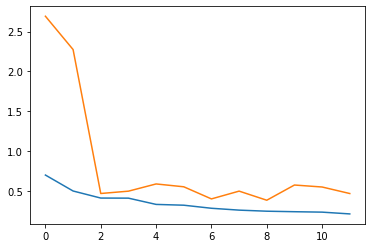

In [0]:
plt.plot([ i[0] for i in normal_loss],[i[1] for i in normal_loss])
plt.plot([ i[0] for i in val_loss],[i[1] for i in val_loss])

In [0]:
model.evaluate(val_data)

54/54 [==============================] - 14s 259ms/step - loss: 0.4862 - accuracy: 0.8780


[0.4862017035484314, 0.8780487775802612]

In [0]:
loss, accuracy = _

In [0]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'validation_images', labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None,
    validation_split=None, subset=None, interpolation='bilinear', follow_links=False
)

Found 4323 files belonging to 5 classes.


In [0]:
model.evaluate(dataset)

136/136 [==============================] - 23s 166ms/step - loss: 160.2584 - accuracy: 0.3079


[160.2583770751953, 0.3078880310058594]

***`This happened because the Image was not rescaled we will rescale the Image and see`***

In [0]:
def rescale(x,y):
  x /= 255.
  return x , y

In [0]:
dataset = dataset.map(rescale)

In [0]:
loss, accuracy = model.evaluate(dataset)

136/136 [==============================] - 23s 166ms/step - loss: 0.2123 - accuracy: 0.9371


In [0]:
accuracy

0.9370807409286499



```
Let's Just try a model which is not using previous models
```



In [0]:
!mkdir validation_images
!mv flowers/flowers/ validation_images

In [0]:

import tensorflow as tf
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.73.222.242:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.73.222.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.73.222.242:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf


In [0]:
tf.__version__

'2.2.0'

In [0]:
# tf.compat.v1.disable_eager_execution()

In [0]:
import os
os.listdir()

['.config',
 'validation_images',
 'flowers',
 'flowers-recognition.zip',
 'kaggle.json',
 'sample_data']

In [0]:
# data_dir = 'flowers/'
# list_ds = 
dataset = tf.data.Dataset.list_files('flowers/*/*.jpg')

In [0]:
for data in dataset:
  print(data.numpy())
  break

b'flowers/daisy/14219214466_3ca6104eae_m.jpg'


In [0]:
def get_label(file_path):
  
  parts = tf.strings.split(file_path, os.path.sep)
  
  return parts[-2] == CLASS_NAMES


In [0]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [256, 256])

In [0]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [0]:
CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
labeled_ds = dataset.map(process_path, num_parallel_calls=AUTOTUNE)

In [0]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(32)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [0]:
labeled_ds = prepare_for_training(labeled_ds)

In [0]:
def resnet_layer(X, filters, kernel_shapes, stage ):

  X_shortcut = X
  last_level = len(filters) - 1

  for idx,(filter_size,kernel_shape) in enumerate(zip(filters,kernel_shapes)):

    X = tf.keras.layers.Conv2D(filter_size,kernel_shape,padding='SAME',activation='relu')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    if idx != last_level:
      X = tf.keras.layers.MaxPool2D((2,2), name = f'max_pool{idx}_stage{stage}')(X)

  X_shortcut = tf.keras.layers.Conv2D(filters[-1],(1,1))(X_shortcut)
  X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)
  X_shortcut = tf.keras.layers.MaxPool2D((2*last_level, 2*last_level), name = f'resnet_pool_stage_{stage}')(X_shortcut)

  X = tf.keras.layers.Add()([X,X_shortcut])

  X = tf.keras.layers.ReLU()(X)

  return X

In [0]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

In [0]:
print(f'running on tpu = {tpu.master()}')

running on tpu = grpc://10.73.222.242:8470


In [0]:
# !pip install tensorflow==2.2-rc1

In [0]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu = '')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.73.222.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.73.222.242:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


In [0]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
tf.compat.v1.disable_eager_execution()

In [0]:

with strategy.scope():
  X_input = tf.keras.layers.Input((256,256,3))

  X = tf.keras.layers.Conv2D(32, (3,3) , padding = 'SAME' , activation = 'relu' )(X_input)
  X = resnet_layer(X , filters = [32 , 64 ,64] , kernel_shapes = [(3,3), (3,3), (3,3)] , stage = 1  )
  X = tf.keras.layers.MaxPool2D((2,2), name = 'afterfisresnetlayer' )(X)


  X = tf.keras.layers.Conv2D(128, (3,3) , padding = 'SAME' , activation = 'relu' )(X_input)
  X = resnet_layer(X , filters = [128 , 128 , 128] , kernel_shapes = [(3,3), (3,3), (3,3)] , stage = 2  )
  X = tf.keras.layers.MaxPool2D((2,2), name = 'aftersecondresnetlayer' )(X)

  X = tf.keras.layers.Flatten()(X)

  X = tf.keras.layers.Dense(256, activation = 'relu')(X)
  # X = tf.keras.layers.Dense(512, activation = 'relu')(X)
  preds = tf.keras.layers.Dense(5 , activation = 'softmax')(X)

  model = tf.keras.models.Model(inputs = X_input , outputs = preds)

  model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics = ['accuracy'])



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# X_input = tf.keras.layers.Input((256,256,3))

# X_shortcut = X_input

# X = tf.keras.layers.Conv2D(32,(3,3),padding='SAME',activation='relu')(X_input)
# X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.MaxPool2D((2,2), name = 'max_pool1')(X)

# X = tf.keras.layers.Conv2D(64,(3,3),padding='SAME',activation='relu')(X)
# X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.MaxPool2D((2,2), name = 'max_pool2')(X)

# X = tf.keras.layers.Conv2D(128,(3,3), padding = 'SAME')(X)
# X = tf.keras.layers.BatchNormalization()(X)

# X_shortcut = tf.keras.layers.Conv2D(128,(1,1))(X_shortcut)
# X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)
# X_shortcut = tf.keras.layers.MaxPool2D((4,4), name = 'resnet_pool')(X_shortcut)

# X = tf.keras.layers.Add()([X,X_shortcut])

# X = tf.keras.layers.ReLU()(X)


# X = tf.keras.layers.MaxPool2D((2,2),name ='last_pool')(X)

# X = tf.keras.layers.Flatten()(X)

# X = tf.keras.layers.Dense(512,activation='relu')(X)

# preds = tf.keras.layers.Dense(5, activation='softmax')(X)

# # X = tf.keras.layers.Conv2D(128,(3,3),padding='SAME',activation='relu')(X_input)
# # X = tf.keras.layers.MaxPool2D((2,2), name = 'max_pool2')(X)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1/255.,
                             shear_range = 0.2,
                             zoom_range =0.2,
                             rotation_range = 40,
                             horizontal_flip = True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             validation_split = 0.2,
                             fill_mode= 'nearest'
                             )


Using TensorFlow backend.


In [0]:
train_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'training',
                                    shuffle=True)

Found 3462 images belonging to 5 classes.


In [0]:
val_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'validation',
                                    shuffle=True)

Found 861 images belonging to 5 classes.


In [0]:
# model = tf.keras.models.Model(inputs = X_input , outputs = preds)

In [0]:
# model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics = ['accuracy'])

In [0]:
BATCH_SIZE = 16 * strategy.num_replicas_in_sync # this is 8 on TPU v3-8, it is 1 on CPU and GPU
LR_START = 0.00001
LR_MAX = 0.00005 * strategy.num_replicas_in_sync
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 5
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .8

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

In [0]:
labeled_ds = labeled_ds.batch(32)

In [0]:
history = model.fit(labeled_ds , epochs = 12 , validation_data = labeled_ds )

RuntimeError: ignored

In [0]:
model.fit(train_data , epochs = 12 , validation_data=val_data)

Epoch 1/12
217/217 [==============================] - 155s 716ms/step - loss: 1.0325 - accuracy: 0.5988 - val_loss: 1.2471 - val_accuracy: 0.4925
Epoch 2/12
217/217 [==============================] - 156s 717ms/step - loss: 1.0053 - accuracy: 0.5988 - val_loss: 0.9973 - val_accuracy: 0.6144
Epoch 3/12
217/217 [==============================] - 155s 715ms/step - loss: 0.9960 - accuracy: 0.6170 - val_loss: 0.9746 - val_accuracy: 0.6492
Epoch 4/12
217/217 [==============================] - 155s 716ms/step - loss: 0.9623 - accuracy: 0.6277 - val_loss: 1.2003 - val_accuracy: 0.5633
Epoch 5/12
217/217 [==============================] - 155s 716ms/step - loss: 0.9672 - accuracy: 0.6115 - val_loss: 0.9287 - val_accuracy: 0.6504
Epoch 6/12
217/217 [==============================] - 155s 715ms/step - loss: 0.9751 - accuracy: 0.6320 - val_loss: 1.0998 - val_accuracy: 0.5772
Epoch 7/12
217/217 [==============================] - 155s 715ms/step - loss: 0.9463 - accuracy: 0.6358 - val_loss: 1.4281 -

In [0]:
model.fit(train_data , epochs = 12 , validation_data=val_data)

Epoch 1/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7991 - accuracy: 0.7045 - val_loss: 0.9314 - val_accuracy: 0.6597
Epoch 2/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7935 - accuracy: 0.7080 - val_loss: 0.8765 - val_accuracy: 0.6678
Epoch 3/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7943 - accuracy: 0.7109 - val_loss: 0.8160 - val_accuracy: 0.7166
Epoch 4/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7891 - accuracy: 0.6973 - val_loss: 0.9484 - val_accuracy: 0.6458
Epoch 5/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7641 - accuracy: 0.7175 - val_loss: 0.8560 - val_accuracy: 0.6864
Epoch 6/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7585 - accuracy: 0.7031 - val_loss: 0.8703 - val_accuracy: 0.6725
Epoch 7/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7582 - accuracy: 0.7213 - val_loss: 0.9878 -

`After training for 50  epochs it's got to 74 % accuracy ( New Network  not Pretrained ) if we train it more epochs we might have more accurate results ..`